**SQL ve Görselleştirme**

* Rio 2016 Olypic Dataseti (https://www.kaggle.com/datasets/rio2016/olympic-games?resource=download&select=athletes.csv)
* SqLite

In [56]:
# Gerekli Kütüphaneler
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# CSV dosyasını yükleme
df = pd.read_csv('athletes.csv')

In [42]:
# CSV dosyasını yükleme ve sqlite db'sine dönüştürme
connection = sql.connect('rio_2016_db.db')
df.to_sql('olympics', connection, if_exists='replace', index=False)

11538

In [43]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [44]:
cur = connection.cursor()

In [45]:
# SQL sorgularını çalıştırmak için bir fonksiyon
def run_query(query):
    return pd.read_sql_query(query, connection)

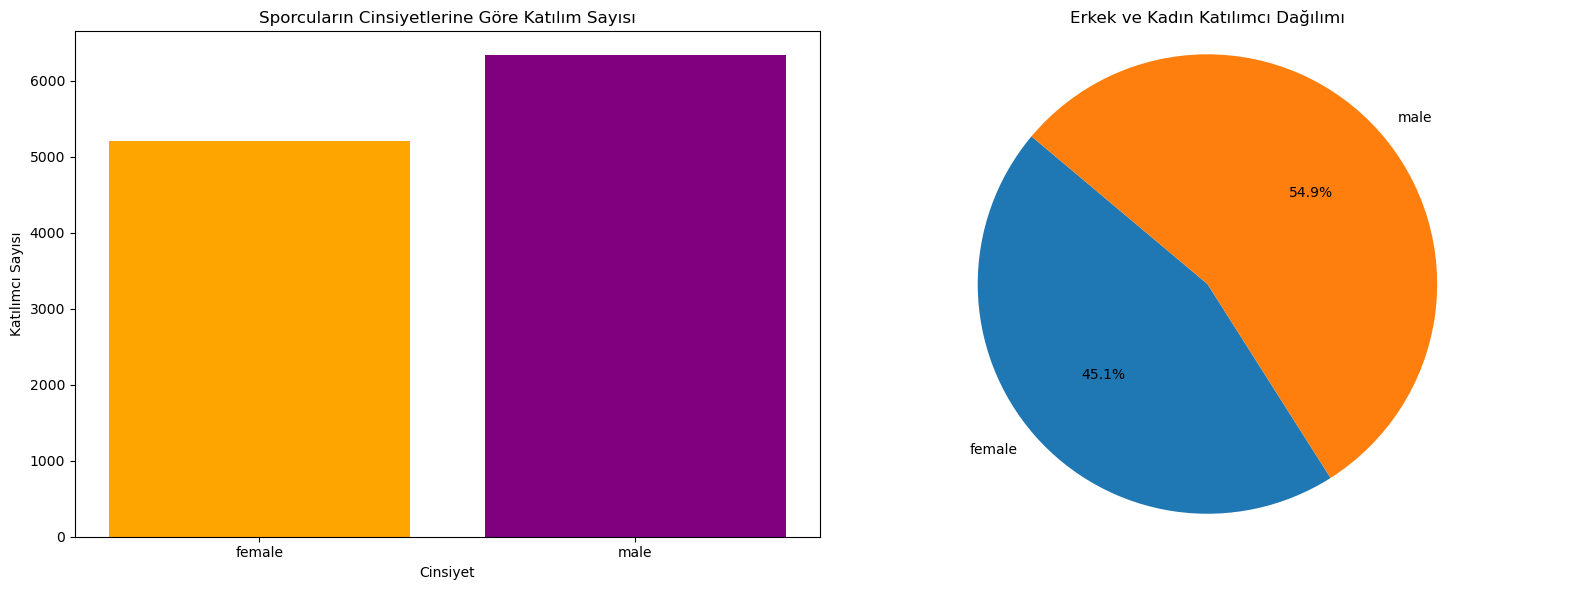

In [57]:
# 1. Sporcuların cinsiyetlerine göre katılım sayısı
query1 = '''
SELECT sex, COUNT(name) AS ParticipantCount
FROM olympics
GROUP BY sex
'''

result1 = run_query(query1)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].bar(result1['sex'], result1['ParticipantCount'], color=['orange', 'purple'])
axs[0].set_xlabel('Cinsiyet')
axs[0].set_ylabel('Katılımcı Sayısı')
axs[0].set_title('Sporcuların Cinsiyetlerine Göre Katılım Sayısı')

axs[1].pie(result1['ParticipantCount'], labels=result1['sex'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Erkek ve Kadın Katılımcı Dağılımı')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

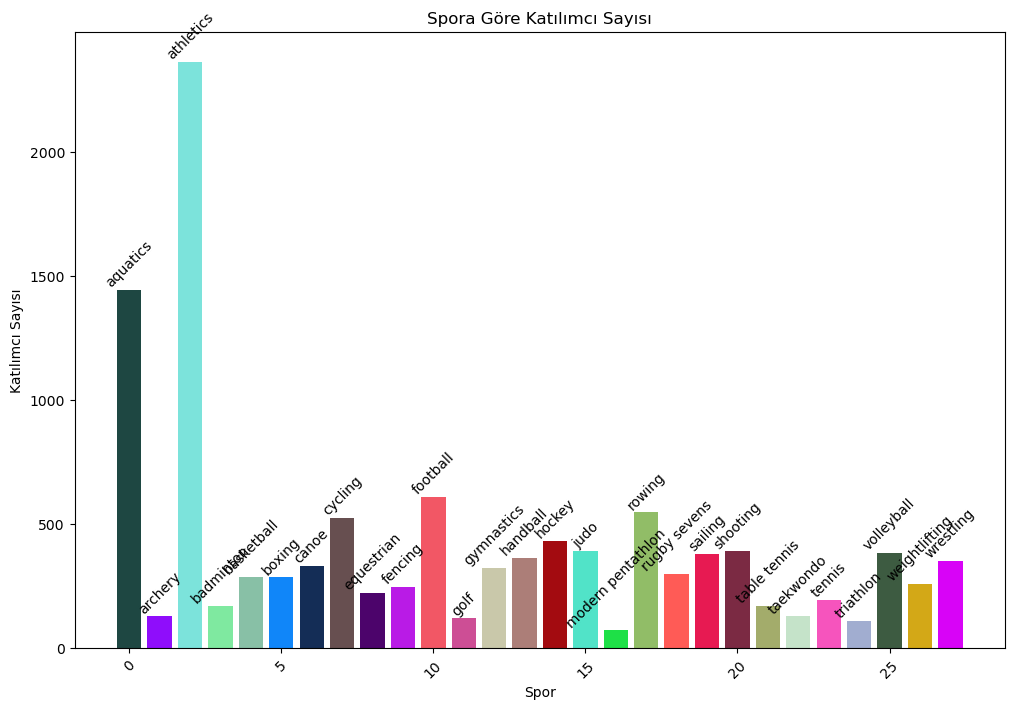

In [47]:
# 2. Spor dalına göre katılımcı sayısı
query1 = '''
SELECT sport, COUNT(DISTINCT name) AS ParticipantCount
FROM olympics
GROUP BY sport
'''
result1 = run_query(query1)
colors = np.random.rand(len(result1), 3)
# Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.bar(result1.index, result1['ParticipantCount'], color=colors)
plt.title('Spora Göre Katılımcı Sayısı')
plt.xlabel('Spor')
plt.ylabel('Katılımcı Sayısı')
plt.xticks(rotation=45)

# Spor adlarını etiket olarak ekleme
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), result1['sport'][i], ha='center', va='bottom', rotation=45)

plt.show()

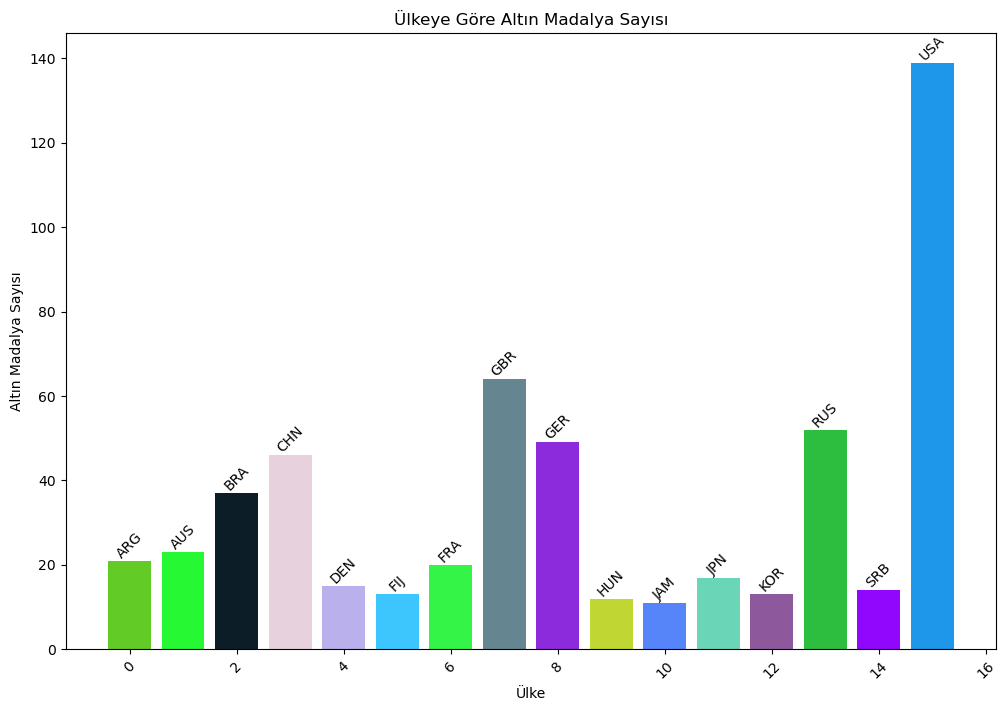

In [48]:
# 3. Ülkeye göre altın madalya sayısı (en az 10 madalya)
query2 = '''
SELECT nationality, SUM(gold) AS TotalGold
FROM olympics
GROUP BY nationality
HAVING TotalGold > 10
'''

result2 = run_query(query2)
colors = np.random.rand(len(result2), 3)  # Rastgele RGB renkler

# Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.bar(result2.index, result2['TotalGold'], color=colors)
plt.title('Ülkeye Göre Altın Madalya Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Altın Madalya Sayısı')
plt.xticks(rotation=45)

# Ülke adlarını etiket olarak ekleme
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), result2['nationality'][i], ha='center', va='bottom', rotation=45)

plt.show()

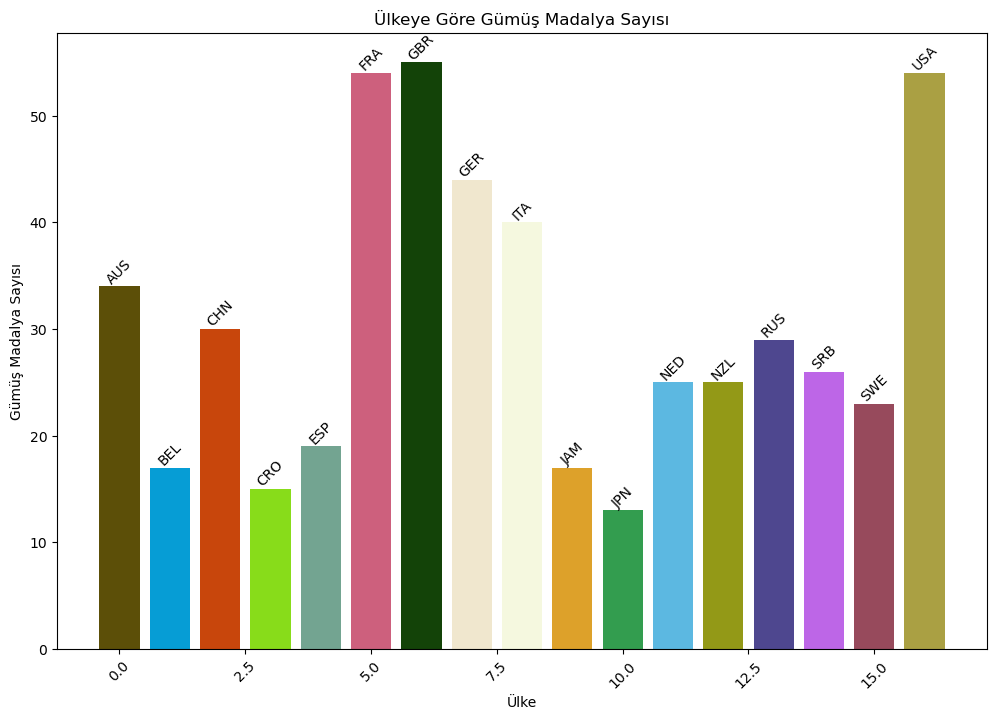

In [49]:
# 4. Ülkeye göre gümüş madalya sayısı (en az 10 madalya)
query3 = '''
SELECT nationality, SUM(silver) AS TotalSilver
FROM olympics
GROUP BY nationality
HAVING TotalSilver > 10
'''

result3 = run_query(query3)
colors = np.random.rand(len(result3), 3)  # Rastgele RGB renkler

# Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.bar(result3.index, result3['TotalSilver'], color=colors)
plt.title('Ülkeye Göre Gümüş Madalya Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Gümüş Madalya Sayısı')
plt.xticks(rotation=45)

# Ülke adlarını etiket olarak ekleme
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), result3['nationality'][i], ha='center', va='bottom', rotation=45)

plt.show()

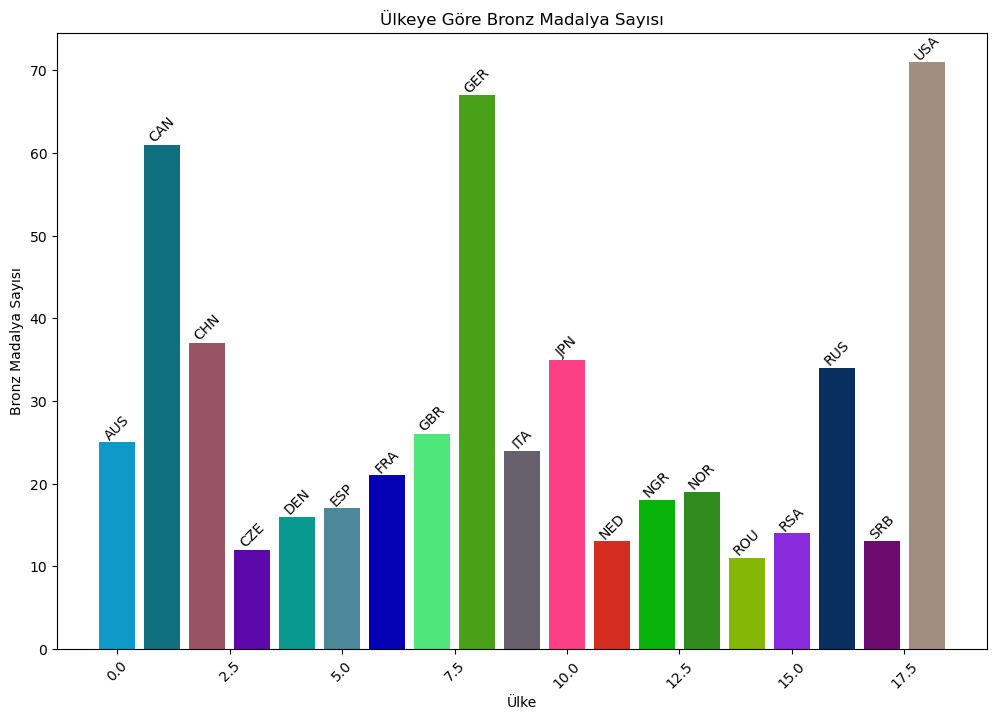

In [50]:
# 5. Ülkeye göre bronz madalya sayısı (en az 10 madalya)
query4 = '''
SELECT nationality, SUM(bronze) AS TotalBronze
FROM olympics
GROUP BY nationality
HAVING TotalBronze > 10
'''

result4 = run_query(query4)
colors = np.random.rand(len(result4), 3)  # Rastgele RGB renkler

# Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.bar(result4.index, result4['TotalBronze'], color=colors)
plt.title('Ülkeye Göre Bronz Madalya Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Bronz Madalya Sayısı')
plt.xticks(rotation=45)

# Ülke adlarını etiket olarak ekleme
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), result4['nationality'][i], ha='center', va='bottom', rotation=45)

plt.show()

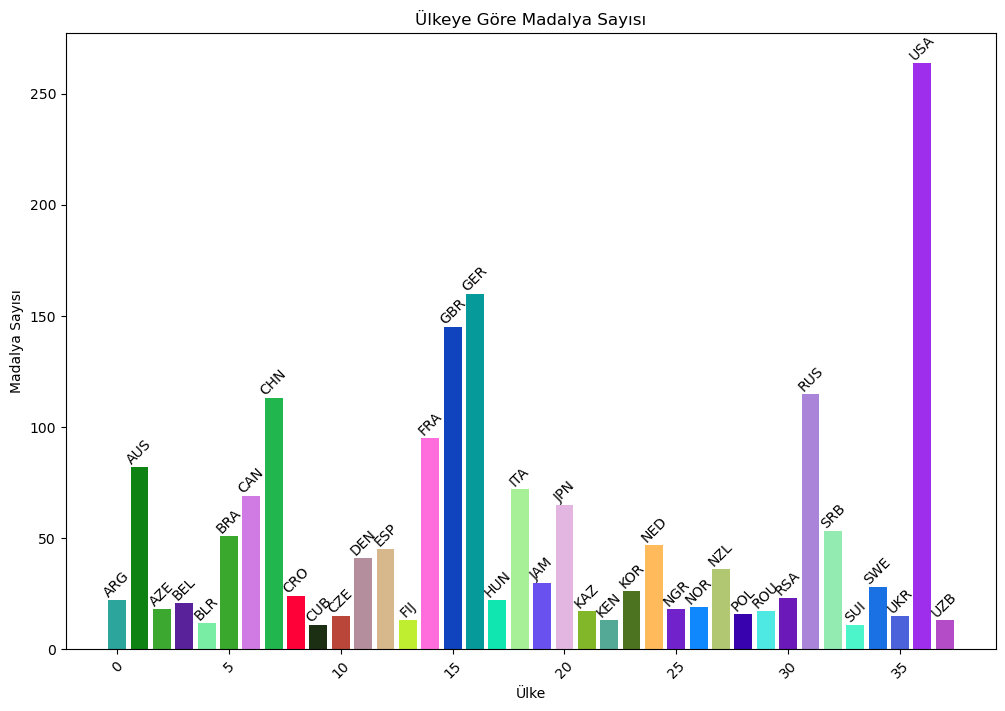

In [51]:
# 6. Ülkeye göre toplam madalya sayısı (en az 10)
query5 = '''
SELECT nationality, SUM(gold + silver + bronze) AS TotalMedals
FROM olympics
GROUP BY nationality
HAVING TotalMedals > 10
'''
result5 = run_query(query5)
colors = np.random.rand(len(result5), 3)  # Rastgele RGB renkler

# Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.bar(result5.index, result5['TotalMedals'], color=colors)
plt.title('Ülkeye Göre Madalya Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Madalya Sayısı')
plt.xticks(rotation=45)

# Ülke adlarını etiket olarak ekleme
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), result5['nationality'][i], ha='center', va='bottom', rotation=45)

plt.show()

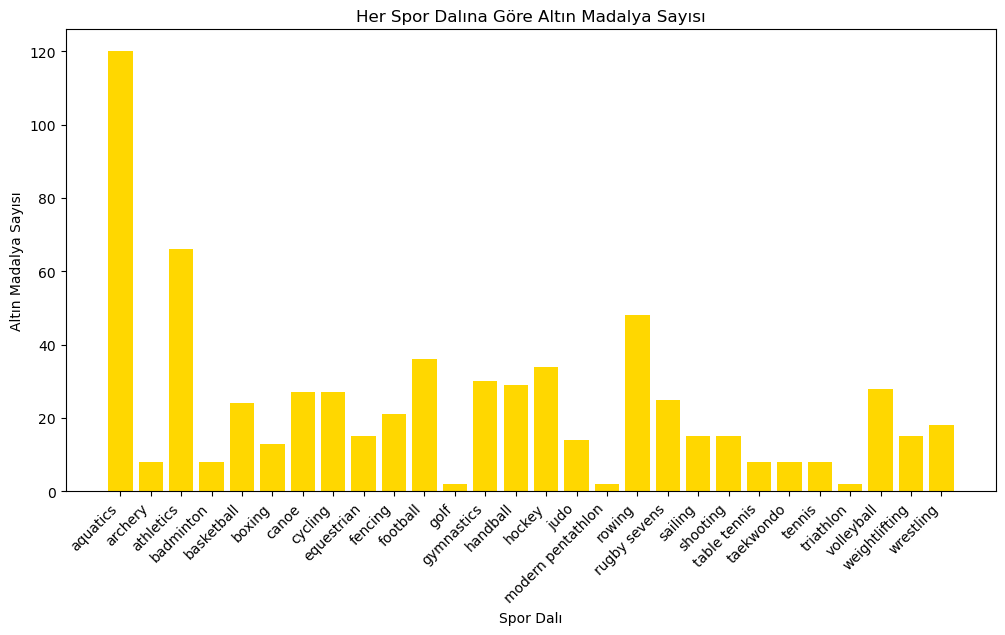

In [52]:
# 7. Her spor dalına göre altın madalya sayısı
query10 = '''
SELECT 
    sport,
    SUM(gold) AS TotalGold
FROM 
    olympics
GROUP BY 
    sport
'''

result10 = run_query(query10)

# Verileri görselleştirme
plt.figure(figsize=(12, 6))
plt.bar(result10['sport'], result10['TotalGold'], color='gold')
plt.xlabel('Spor Dalı')
plt.ylabel('Altın Madalya Sayısı')
plt.title('Her Spor Dalına Göre Altın Madalya Sayısı')
plt.xticks(rotation=45, ha='right')
plt.show()

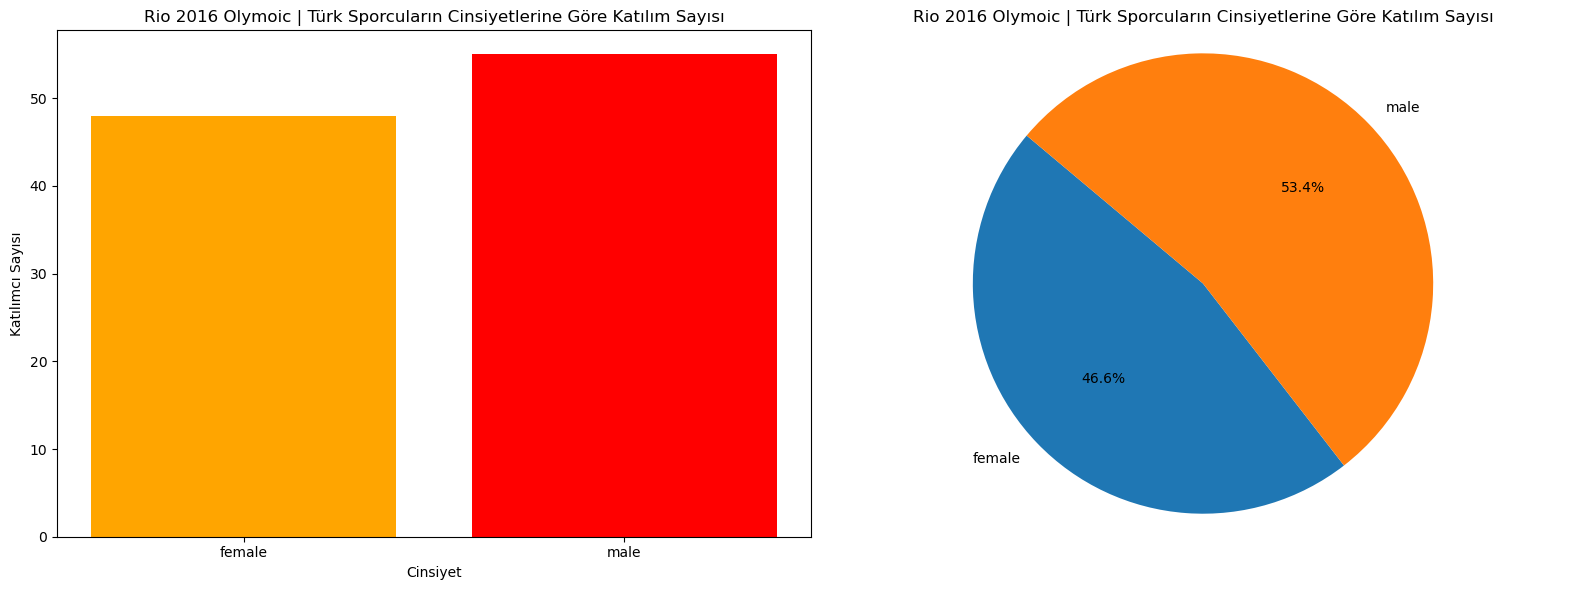

In [53]:
# 8. Cinsiyete göre katılımcı sayıları (Türkiye)
query_gender = '''
SELECT sex, COUNT(*) AS ParticipantCount
FROM olympics
WHERE 
    nationality = 'TUR'
GROUP BY sex
'''

result_gender = run_query(query_gender)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].bar(result_gender['sex'], result_gender['ParticipantCount'], color=['orange', 'red'])
axs[0].set_xlabel('Cinsiyet')
axs[0].set_ylabel('Katılımcı Sayısı')
axs[0].set_title('Rio 2016 Olymoic | Türk Sporcuların Cinsiyetlerine Göre Katılım Sayısı')

axs[1].pie(result_gender['ParticipantCount'], labels=result_gender['sex'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Rio 2016 Olymoic | Türk Sporcuların Cinsiyetlerine Göre Katılım Sayısı')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

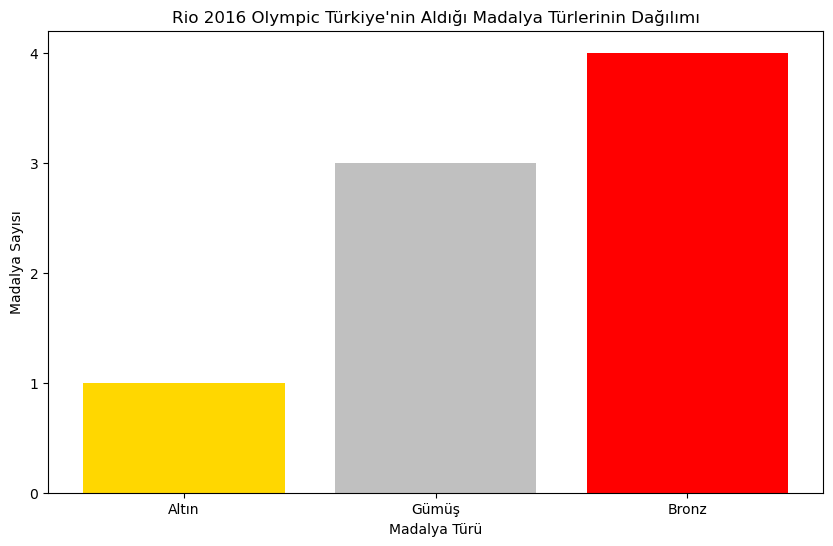

In [54]:
# 9. Türkiye'nin aldığı altın, gümüş ve bronz sayısı
query7 = '''
SELECT 
    SUM(gold) AS TotalGold,
    SUM(silver) AS TotalSilver,
    SUM(bronze) AS TotalBronze
FROM 
    olympics
WHERE 
    nationality = 'TUR'
'''

result7 = run_query(query7)
# Görselleştirme
plt.figure(figsize=(10, 6))

medal_types = ['Altın', 'Gümüş', 'Bronz']
medal_counts = [result7['TotalGold'].iloc[0], result7['TotalSilver'].iloc[0], result7['TotalBronze'].iloc[0]]
plt.bar(medal_types, medal_counts, color=['gold', 'silver', 'red'])

plt.xlabel('Madalya Türü')
plt.ylabel('Madalya Sayısı')
plt.title('Rio 2016 Olympic Türkiye\'nin Aldığı Madalya Türlerinin Dağılımı')
# Y ekseni için tam sayıları kullanalım
plt.yticks(range(int(max(medal_counts)) + 1))

plt.show()

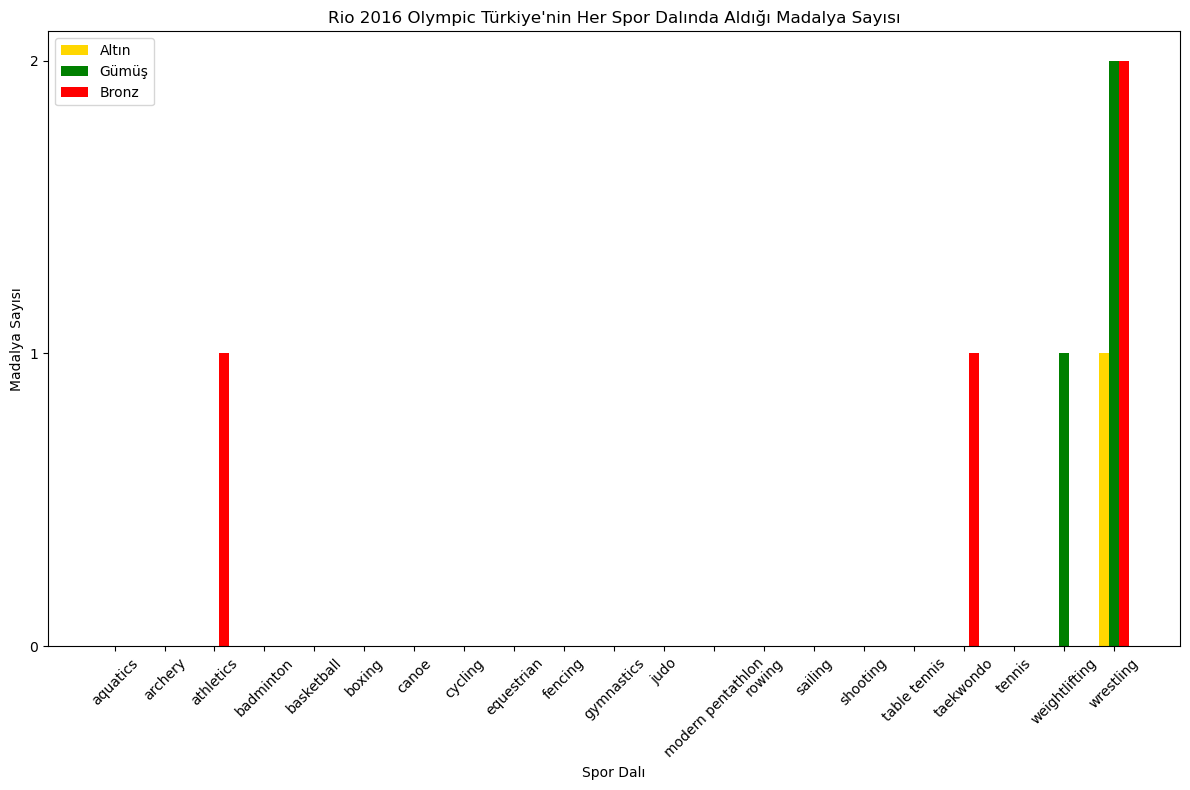

In [55]:
# 10. Türkiye'nin her spor dalında aldığı altın, gümüş ve bronz madalya sayısı
query_turkey_medals = '''
SELECT 
    sport,
    SUM(gold) AS TotalGold,
    SUM(silver) AS TotalSilver,
    SUM(bronze) AS TotalBronze
FROM 
    olympics
WHERE 
    nationality = 'TUR'
GROUP BY 
    sport
'''

result_turkey_medals = run_query(query_turkey_medals)
plt.figure(figsize=(12, 8))

bar_width = 0.2
index = range(len(result_turkey_medals))  # Tam sayılarla indeks oluşturalım

plt.bar([i - bar_width for i in index], result_turkey_medals['TotalGold'], width=bar_width, color='gold', label='Altın')
plt.bar(index, result_turkey_medals['TotalSilver'], width=bar_width, color='green', label='Gümüş')
plt.bar([i + bar_width for i in index], result_turkey_medals['TotalBronze'], width=bar_width, color='red', label='Bronz')

plt.xlabel('Spor Dalı')
plt.ylabel('Madalya Sayısı')
plt.title('Rio 2016 Olympic Türkiye\'nin Her Spor Dalında Aldığı Madalya Sayısı')
plt.xticks(index, result_turkey_medals['sport'], rotation=45)
plt.legend()

# Y ekseni için tam sayıları kullanalım
plt.yticks(range(int(max(result_turkey_medals[['TotalGold', 'TotalSilver', 'TotalBronze']].max())) + 1))

plt.tight_layout()

plt.show()